Как писать алгоритм для n-го числа Фибоначчи, работает за экспоненциальное время

In [32]:
def fib1(n):
    assert n >= 0
    return n if n <= 1 else fib1(n-1) + fib1(n-2)
fib1(8)

old_fib1 = fib1

Воспользуемся модулем rsviz, который позволяет визуализировать рекурсивные функции в языке python
P.S. Вообще никак не получается установить :( и visualiser тоже

Заведём глобальную переменную, в которой будем хранить уже вычисленные числа фибоначчи по их номеру, ну а затем изменим функцию fib1 таким образом, чтобы 
она использовала эти вычисленные значения, а не вычисляла их снова


In [39]:
cache = {} #our dictionary

def fib2(n):
    assert n >= 0
    if n not in cache:
        cache[n] = n if n <= 1 else fib2(n - 1) + fib2(n - 2)
    return cache[n]

fib2(800)

#cash may be clean
cache.clear()
#зависнет если вызвать от 8000, так как опирается на глубину рекурсии 
# в питоне, там её можжно делать не больше какого-то ограниченного числа раз

Но переменная кэш у нас глобальная, а значит кто угодно може в неё посмотреть, кто угодно может записать в неё что-нибудь и всё нам испортить

Давайте напишем декоратор "мемо", которая делает ровно то, что мы хотим -- создаёт локальную переменную "кэш" и затем запоминает результаты вызова декорируемой функции в "кэш"

In [34]:
def memo(f):
    cache = {}
    
def memo(f):
    cache = {}
    def inner(n):
        if n not in cache:
            cache[n] = f(n)
        return cache[n]
    return inner

fib1 = memo(old_fib1) #analog memo's decorator = lru_cache(smth like that)
fib1(80)

23416728348467685

In [36]:
from functools import lru_cache
fib1 = lru_cache(maxsize = None)(old_fib1)
fib1(80)

23416728348467685

In [38]:
#напишем fib3 использующую итерацию вместо рекурсии
def fib3(n):
    assert n >= 0
    f0, f1 = 0, 1
    for i in range(n - 1):
        f0, f1 = f1, f0 + f1
    return f1
fib3(8)
fib3(8000)

3561533204460626739768914905427460387141369539110154082973500638991885819498711815304829246223963373749873423083216889782034228521693267175594214186111978816819236959743284321273097535654614718808050244321699002512466203835566030351092652496815708455980825654877181538741827129421689128991879649533246136168998590044965735035810856774605383628378979290580539135791985063484992877932473487054068899476937399295193905527420792975902913836012199062687063537510151753758100626402591751183925883151617648375005313453493271681248233059858496951790113255897429539560654496639601132039360167542277472498901884679404509894269174519328918160745655327632006736189766801968534195725815421784083495026969542066047758885029695257263330719223956309043195653930347983496830801755572982419821881275569179922973415736010289561700699477021488635509784509168019589640190234350021673802856836365767446249424907273016689053388000785637444921523414602360860001530139933615215383220927084750528293779491002813557093860863839

Какова динамика изменения времени работы для функций fib1 и fib3 в зависимости от аргумента n 
Для этого научимся измерять время работы функций в питоне

In [41]:
import time

def timed(f, *args, n_iter=100):
    acc = float("inf")
    for i in range(n_iter):
        t0 = time.perf_counter()
        f(*args)
        t1 = time.perf_counter()
        acc = min(acc, t1 - t0)
    return acc

timed(fib3, 800)

4.759995499625802e-05

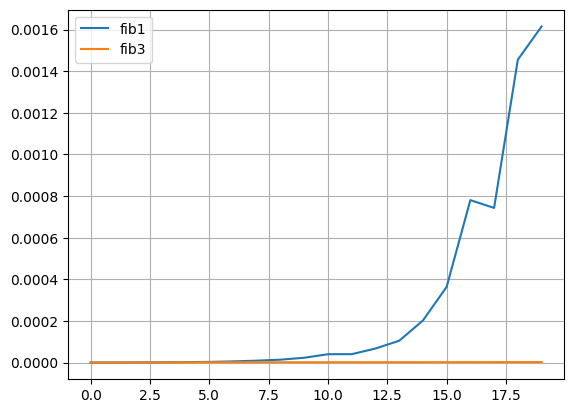

In [42]:
from matplotlib import pyplot as plt

def compare(fs, args):
    for f in fs:
        plt.plot(args, [timed(f, arg) for arg in args], label=f.__name__)
    plt.legend()
    plt.grid(True)

fib1 = old_fib1
compare([fib1, fib3], list(range(20)))

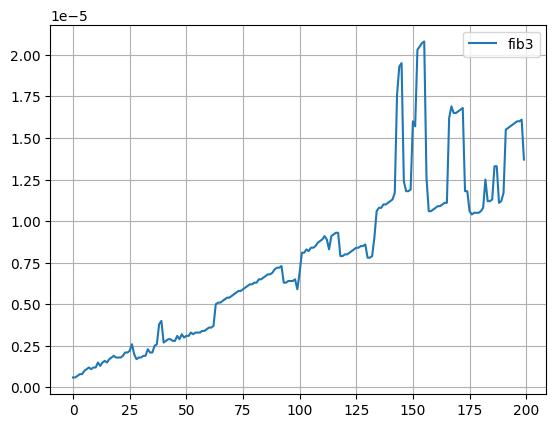

In [43]:
compare([fib3], list(range(200)))